In [54]:
import pandas as pd
import numpy as np
import kagglehub
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input
from sklearn.preprocessing import MinMaxScaler

In [55]:
# Download latest version
path = kagglehub.dataset_download("mohdsharik/sensor-sourse-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sensor-sourse-data


In [56]:
# Reading the file that has power predictions
preds_df = pd.read_csv('/kaggle/input/sensor-sourse-data/final_sensor_power_preds_df.csv') 

In [57]:
# reading the first five records
preds_df.head()

,Server_Date,Voltage,Frequency,Energy,Power_Factor,sin_hour,day,day_of_week,Type,Real_time_power,Power_to_predict,1_hour_future_power_preds
0,26-05-2021 15:00,120.024852,59.929887,47.6900,0.859525,-0.707107,26,2,train,95.905531,95.920207,95.775349
1,26-05-2021 15:10,120.038583,59.957625,47.7055,0.859379,-0.707107,26,2,train,95.983083,95.919000,95.774755
2,26-05-2021 15:20,120.029510,59.949168,47.7215,0.858604,-0.707107,26,2,train,95.876458,95.873187,95.751460
3,26-05-2021 15:30,120.043091,59.970906,47.7360,0.859702,-0.707107,26,2,train,95.886028,95.815872,95.705962
4,26-05-2021 15:40,120.036500,59.958708,47.7542,0.859467,-0.707107,26,2,train,96.024292,95.943263,95.763383


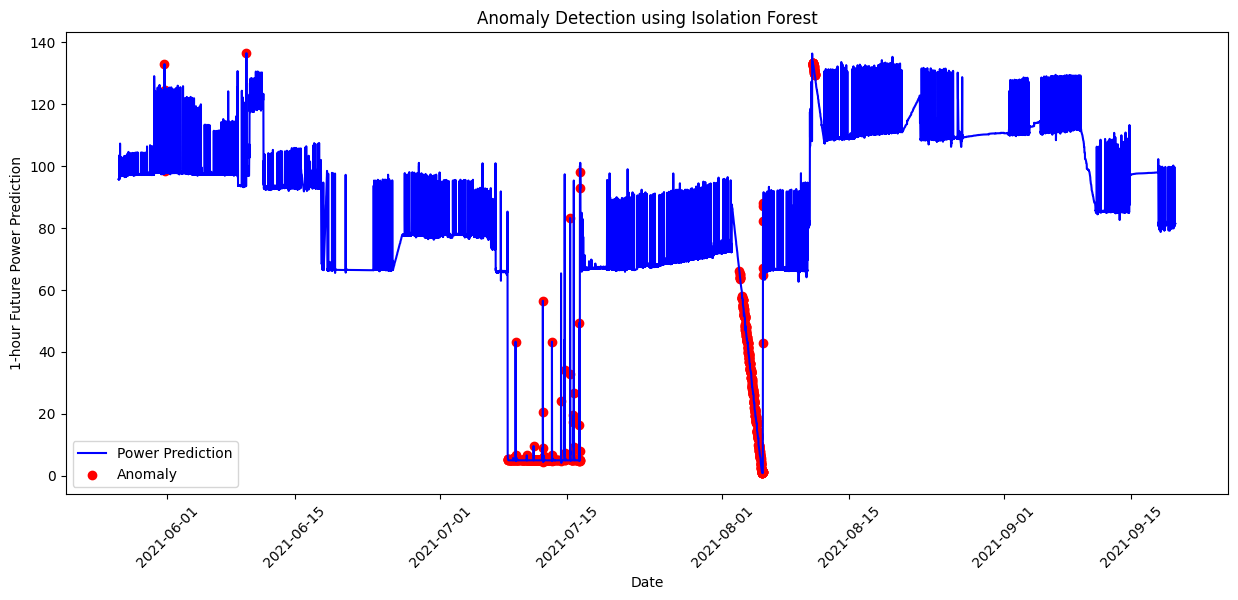

In [63]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming preds_df is already loaded as your dataframe

# Step 1: Preprocess the data (normalize features except the datetime column)
features = ['Voltage', 'Frequency', 'Energy', 'Power_Factor', 'day', 'day_of_week', '1_hour_future_power_preds']

new_df = preds_df.copy()
# Normalize the features
scaler = MinMaxScaler()
new_df[features] = scaler.fit_transform(preds_df[features])

# Step 2: Create the feature matrix (excluding the datetime column and target variable)
X = new_df[features].values

# Step 3: Fit the Isolation Forest model
model = IsolationForest(contamination=0.04, random_state=1234)  # Adjust contamination based on expected anomalies
anomaly_preds = model.fit_predict(X)

# Convert the predicted labels to categorical labels ('Normal' and 'Anomaly')
preds_df['Anomaly'] = pd.Series(anomaly_preds).replace({1: 'Normal', -1: 'Anomaly'})

preds_df['Server_Date'] = pd.to_datetime(preds_df['Server_Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Step 4: Visualize the anomalies
plt.figure(figsize=(15, 6))
plt.plot(preds_df['Server_Date'], preds_df['1_hour_future_power_preds'], label="Power Prediction", color='blue')

# Highlight anomalies
plt.scatter(preds_df['Server_Date'][preds_df['Anomaly'] == 'Anomaly'],
            preds_df['1_hour_future_power_preds'][preds_df['Anomaly'] == 'Anomaly'],
            color='red', label="Anomaly")

plt.xlabel("Date")
plt.ylabel("1-hour Future Power Prediction")
plt.title("Anomaly Detection using Isolation Forest")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [59]:
preds_df

,Server_Date,Voltage,Frequency,Energy,Power_Factor,sin_hour,day,day_of_week,Type,Real_time_power,Power_to_predict,1_hour_future_power_preds,Anomaly
0,2021-05-26 15:00:00,120.024852,59.929887,47.690000,0.859525,-0.707107,26,2,train,95.905531,95.920207,95.775349,Normal
1,2021-05-26 15:10:00,120.038583,59.957625,47.705500,0.859379,-0.707107,26,2,train,95.983083,95.919000,95.774755,Normal
2,2021-05-26 15:20:00,120.029510,59.949168,47.721500,0.858604,-0.707107,26,2,train,95.876458,95.873187,95.751460,Normal
3,2021-05-26 15:30:00,120.043091,59.970906,47.736000,0.859702,-0.707107,26,2,train,95.886028,95.815872,95.705962,Normal
4,2021-05-26 15:40:00,120.036500,59.958708,47.754200,0.859467,-0.707107,26,2,train,96.024292,95.943263,95.763383,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,2021-09-19 19:30:00,120.105504,59.966106,279.761786,0.939394,-0.965926,19,6,test,81.854803,82.294073,81.496294,Normal
16732,2021-09-19 19:40:00,120.107281,59.971764,279.774143,0.939946,-0.965926,19,6,test,82.272898,82.175063,81.366148,Normal
16733,2021-09-19 19:50:00,120.109587,59.973048,279.787964,0.939607,-0.965926,19,6,test,82.159480,82.245620,81.318705,Normal
16734,2021-09-19 20:00:00,120.106219,59.971425,279.802263,0.939944,-0.866025,19,6,test,82.279195,82.231845,81.436070,Normal


In [60]:
preds_df.to_csv('Power_anomaly_prediction.csv', index = False)